In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import itertools

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.ar_model import AutoRegResults
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [3]:
country = pd.read_csv("country.csv")
country

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,...,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262963,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262964,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262965,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262966,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
country.columns

Index(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR',
       'EL', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'NL', 'NO', 'PL', 'PT',
       'RO', 'SI', 'SK', 'SE', 'UK'],
      dtype='object')

In [5]:
country_dict = {
'AT': 'Austria',
'BE': 'Belgium',
'BG': 'Bulgaria',
'CH': 'Switzerland',
'CY': 'Cyprus',
'CZ': 'Czech Republic',
'DE': 'Germany',
'DK': 'Denmark',
'EE': 'Estonia',
'ES': 'Spain',
'FI': 'Finland',
'FR': 'France',
'EL': 'Greece',
'UK': 'United Kingdom',
'HU': 'Hungary',
'HR': 'Croatia',
'IE': 'Ireland',
'IT': 'Italy',
'LT': 'Lithuania',
'LU': 'Luxembourg',
'LV': 'Latvia',
'NO': 'Norway',
'NL': 'Netherlands',
'PL': 'Poland',
'PT': 'Portugal',
'RO': 'Romania',
'SE': 'Sweden',
'SI': 'Slovenia',
'SK': 'Slovakia'
    }

In [6]:
data=country.rename(columns=country_dict)

In [7]:
data

,Austria,Belgium,Bulgaria,Switzerland,Cyprus,Czech Republic,Germany,Denmark,Estonia,Spain,...,Latvia,Netherlands,Norway,Poland,Portugal,Romania,Slovenia,Slovakia,Sweden,United Kingdom
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262963,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262964,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262965,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262966,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data_solar = pd.read_csv("D:/Bit Code/Solar Panel/PVGIS.csv")
data_solar = data_solar.drop(columns=['time_step'])
data_solar.tail(2)
data_solar.shape

(262968, 260)

In [9]:
data_solar_transposed = data_solar[-24*365:].T
data_solar_transposed.tail(2)

,254208,254209,254210,254211,254212,254213,254214,254215,254216,254217,...,262958,262959,262960,262961,262962,262963,262964,262965,262966,262967
UKL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00454,...,0.05831,0.04033,0.00142,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UKE4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00422,...,0.10068,0.03251,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
def plot_elbow_scores(df_, cluster_nb):
    km_inertias, km_scores = [], []

    for k in range(2, cluster_nb):
        km = KMeans(n_clusters=k).fit(df_)
        km_inertias.append(km.inertia_)
        km_scores.append(silhouette_score(df_, km.labels_))

    sns.lineplot(range(2, cluster_nb), km_inertias)
    plt.title('elbow graph / inertia depending on k')
    plt.show()

    sns.lineplot(range(2, cluster_nb), km_scores)
    plt.title('scores depending on k')
    plt.show()

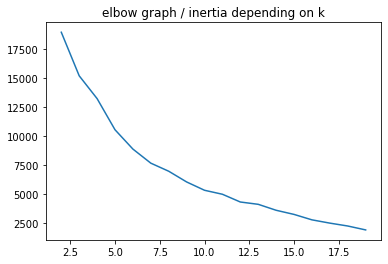

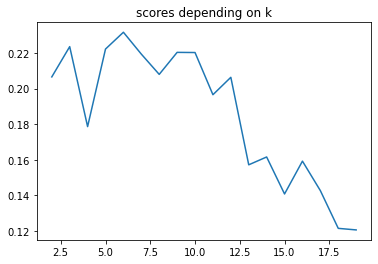

In [11]:
data_country_transposed = data[-24*365*10:].T
plot_elbow_scores(data_country_transposed, 20)

In [12]:
X = data_country_transposed

km = KMeans(n_clusters=6).fit(X)
X['label'] = km.labels_
print("Cluster nb / Nb of countries in the cluster", X.label.value_counts())

print("\nCountries grouped by cluster")
for k in range(6):
    print(f'\ncluster nb {k} : ', " ".join([ f' ({c}),' for c in list(X[X.label == k].index)]))

Cluster nb / Nb of countries in the cluster 0    9
1    7
3    5
5    3
4    3
2    2
Name: label, dtype: int64

Countries grouped by cluster

cluster nb 0 :   (Austria),  (Switzerland),  (Czech Republic),  (Croatia),  (Hungary),  (Italy),  (Poland),  (Slovenia),  (Slovakia),

cluster nb 1 :   (Belgium),  (Germany),  (Denmark),  (France),  (Luxembourg),  (Netherlands),  (United Kingdom),

cluster nb 2 :   (Spain),  (Portugal),

cluster nb 3 :   (Cyprus),  (Finland),  (Ireland),  (Norway),  (Sweden),

cluster nb 4 :   (Estonia),  (Lithuania),  (Latvia),

cluster nb 5 :   (Bulgaria),  (Greece),  (Romania),


In [13]:
#select one country from each culster
data_selected = data[['Switzerland', 'Finland', 'France', 'Portugal', 'Norway', 'Greece']]
data_selected.head(2)

,Switzerland,Finland,France,Portugal,Norway,Greece
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Switzerland  262968 non-null  float64
 1   Finland      262968 non-null  float64
 2   France       262968 non-null  float64
 3   Portugal     262968 non-null  float64
 4   Norway       262968 non-null  float64
 5   Greece       262968 non-null  float64
dtypes: float64(6)
memory usage: 12.0 MB


In [15]:
def add_date_time(_df):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start='1/1/1986', periods=_df.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['year'] = _df['time'].dt.year
    _df['month'] = _df['time'].dt.month
    _df['week'] = _df['time'].dt.weekofyear
    _df['day'] = _df['time'].dt.dayofyear    
    _df['hour'] = _df['time'].dt.hour
    return _df

In [16]:
data_selected=add_date_time(data_selected)

In [17]:
data_selected

,Switzerland,Finland,France,Portugal,Norway,Greece,time,year,month,week,day,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 00:00:00,1986,1,1,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 01:00:00,1986,1,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 02:00:00,1986,1,1,1,2
3,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 03:00:00,1986,1,1,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 04:00:00,1986,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
262963,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 19:00:00,2015,12,53,365,19
262964,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 20:00:00,2015,12,53,365,20
262965,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 21:00:00,2015,12,53,365,21
262966,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,2015,12,53,365,22


In [18]:
def plot_hourly(df, title):
    plt.figure(figsize=(12, 6))
    for c in df.columns:
        if c != 'hour':
            sns.lineplot(x="hour", y=c, data=df, label=c)
            #plt.legend(c)
    plt.title(title)
    plt.show()
    

In [19]:
temp_df = data_selected[(5 < data_selected.hour) & (data_selected.hour < 22)]
temp_df = temp_df.drop(columns=['time', 'hour', 'month', 'week','year','day'])
temp_df.describe()

,Switzerland,Finland,France,Portugal,Norway,Greece
count,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000,175312.000000
mean,0.191551,0.099533,0.191680,0.312295,0.075220,0.251305
std,0.197423,0.142873,0.187002,0.289589,0.103796,0.254603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.129509,0.020212,0.147011,0.253450,0.025330,0.181794
75%,0.337995,0.157080,0.339958,0.574163,0.111076,0.468308
max,0.729027,0.615942,0.701985,0.911096,0.487921,0.863731


Text(0.5, 1.0, "Distribution of the station's efficiency")

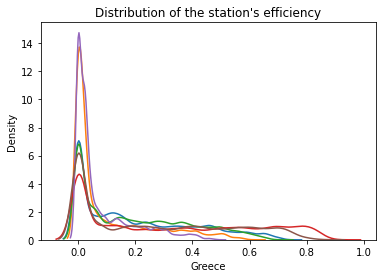

In [20]:
plt.figure()
for col in temp_df.columns:
    sns.distplot(temp_df[col], label=col, hist=False)
plt.title("Distribution of the station's efficiency")

In [21]:
def plot_corr(df_):
    corr = df_.corr()
    corr
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(corr, mask=mask, center=0, square=True, cmap='Spectral', linewidths=.5, cbar_kws={"shrink": .5}) #annot=True


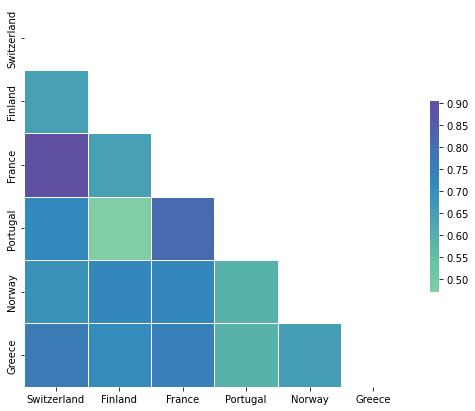

In [22]:
plot_corr(temp_df)

In [23]:
temp_df.corr()

,Switzerland,Finland,France,Portugal,Norway,Greece
Switzerland,1.000000,0.642677,0.902973,0.714069,0.683800,0.757181
Finland,0.642677,1.000000,0.646947,0.470985,0.723009,0.706405
France,0.902973,0.646947,1.000000,0.815511,0.724858,0.741772
Portugal,0.714069,0.470985,0.815511,1.000000,0.588910,0.586798
Norway,0.683800,0.723009,0.724858,0.588910,1.000000,0.656294
Greece,0.757181,0.706405,0.741772,0.586798,0.656294,1.000000


<AxesSubplot:xlabel='None-month', ylabel='hour'>

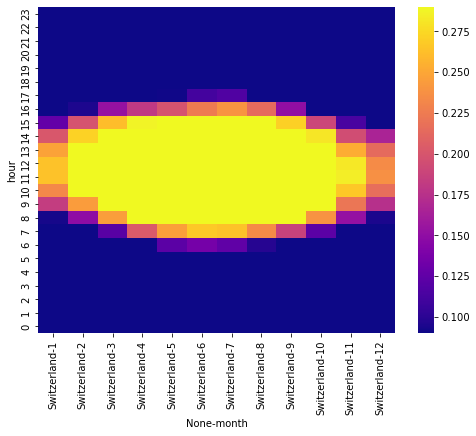

In [24]:
data_selected['year'] = data_selected['time'].dt.year
plt.figure(figsize=(8, 6))
temp_df = data_selected[['Switzerland', 'month', 'hour']]
temp_df = temp_df.groupby(['hour', 'month']).mean()
temp_df = temp_df.unstack('month').sort_index(ascending=False)
sns.heatmap(temp_df, vmin = 0.09, vmax = 0.29, cmap = 'plasma')

In [25]:
data_selected.head()

,Switzerland,Finland,France,Portugal,Norway,Greece,time,year,month,week,day,hour
0,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 00:00:00,1986,1,1,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 01:00:00,1986,1,1,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 02:00:00,1986,1,1,1,2
3,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 03:00:00,1986,1,1,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,1986-01-01 04:00:00,1986,1,1,1,4


In [26]:
df_time =data_selected[['time','Switzerland']]

In [27]:
df_time

,time,Switzerland
0,1986-01-01 00:00:00,0.0
1,1986-01-01 01:00:00,0.0
2,1986-01-01 02:00:00,0.0
3,1986-01-01 03:00:00,0.0
4,1986-01-01 04:00:00,0.0
...,...,...
262963,2015-12-31 19:00:00,0.0
262964,2015-12-31 20:00:00,0.0
262965,2015-12-31 21:00:00,0.0
262966,2015-12-31 22:00:00,0.0


In [28]:
temp=df_time['time'].values
type(temp)

numpy.ndarray

In [29]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         262968 non-null  datetime64[ns]
 1   Switzerland  262968 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 MB


In [30]:
df_time['time'].values

array(['1986-01-01T00:00:00.000000000', '1986-01-01T01:00:00.000000000',
       '1986-01-01T02:00:00.000000000', ...,
       '2015-12-31T21:00:00.000000000', '2015-12-31T22:00:00.000000000',
       '2015-12-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [31]:
df_time=df_time.sort_values('time')

In [32]:
df_time.isnull().sum()

time           0
Switzerland    0
dtype: int64

In [33]:
df_time = df_time.groupby('time')['Switzerland'].sum().reset_index()

In [34]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time         262968 non-null  datetime64[ns]
 1   Switzerland  262968 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 MB


In [35]:
train_size = int(len(df_time) * 0.80)
train_size

210374

In [36]:
train, test = df_time[0:train_size], df_time[train_size:len(data)]

In [37]:
train = train.set_index('time')

In [38]:
train

,Switzerland
time,
1986-01-01 00:00:00,0.000000
1986-01-01 01:00:00,0.000000
1986-01-01 02:00:00,0.000000
1986-01-01 03:00:00,0.000000
1986-01-01 04:00:00,0.000000
...,...
2009-12-31 09:00:00,0.084564
2009-12-31 10:00:00,0.104627
2009-12-31 11:00:00,0.110929


In [39]:
y = train['Switzerland'].resample('M').mean()
y

time
1986-01-31    0.061517
1986-02-28    0.109479
1986-03-31    0.122028
1986-04-30    0.112568
1986-05-31    0.162257
                ...   
2009-08-31    0.187353
2009-09-30    0.155279
2009-10-31    0.113942
2009-11-30    0.070509
2009-12-31    0.049871
Freq: M, Name: Switzerland, Length: 288, dtype: float64

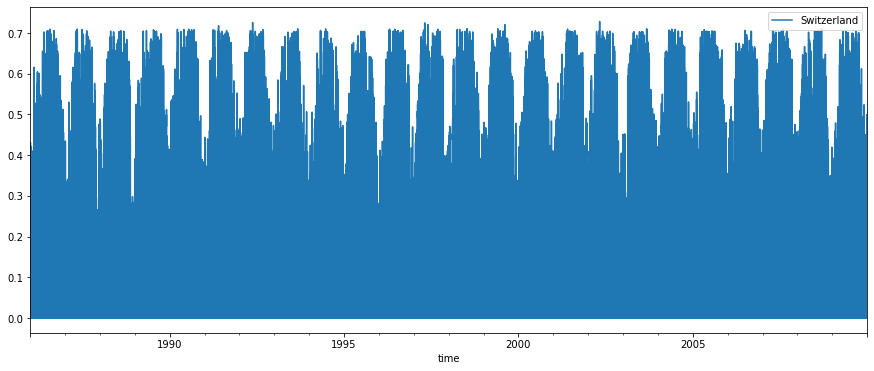

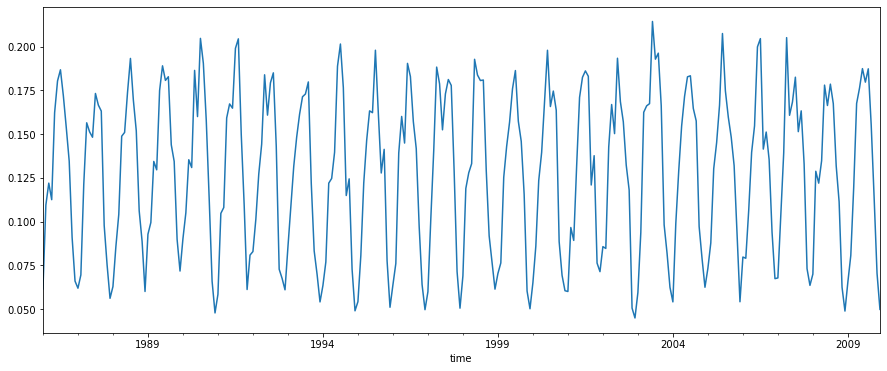

In [40]:
#training hourly basis
train.plot(figsize=(15, 6))
plt.show()
#Monthly basis
y.plot(figsize=(15, 6))
plt.show()

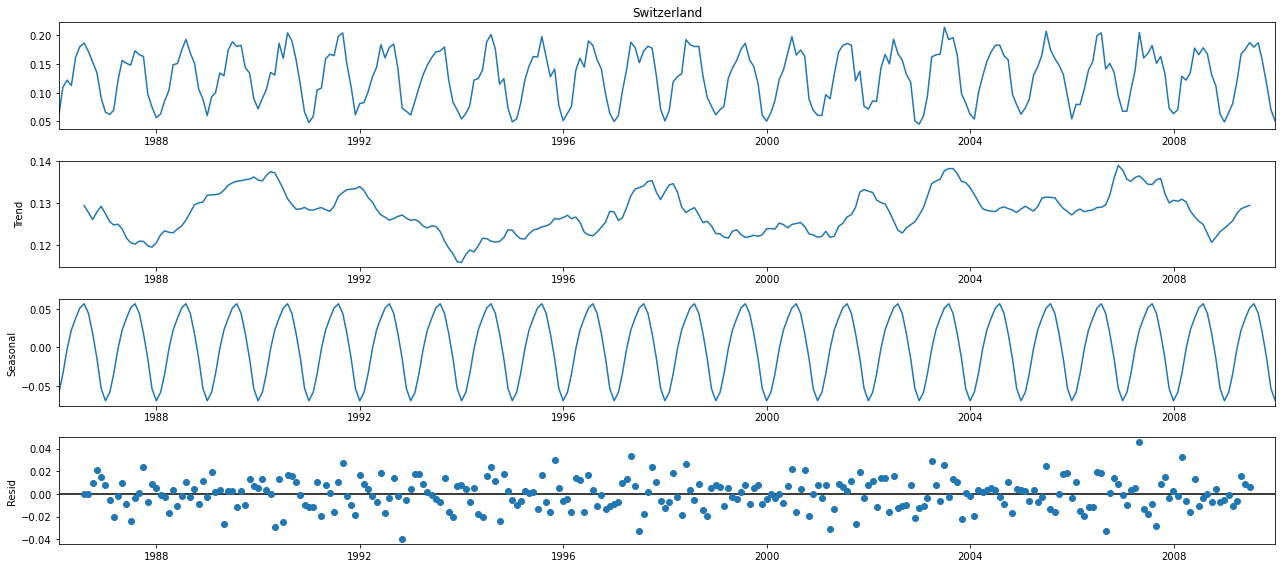

In [41]:

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [42]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [43]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
# Hypothesis 
# H0: Data are stationary 
# H1: Data are not stationary

kpss_test(train)

KPSS Statistic: 0.1739064483632628
p-value: 0.1
num lags: 82
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


In [44]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [45]:
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.ar_model import AutoRegResults
from sklearn.model_selection import train_test_split


aic=[]
l_param=[]
l_param_seasonal=[]
temp=0
lowest=10000000000000000000

print(pdq)
print(seasonal_pdq)

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic.append(results.aic)
            temp=results.aic
            if(temp<lowest):
                lowest=temp
                l_param=param
                l_param_seasonal=param_seasonal
            
        except:
            continue
print("++++++"*20)            
print(min(aic))
print(lowest)
print(l_param)
print(l_param_seasonal)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-329.07245352003673
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-603.205883278191
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-1358.6830117053762
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-1436.5046406357792
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-1363.920975295573
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-1490.920192255257
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-1358.9879211529087
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-1423.622495745677
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-659.4963262970027
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-846.9757855203748
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-1356.8392543191933
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-1429.6610365661468
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-1364.4323747998287
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-1487.3247630935864

In [46]:
mod = sm.tsa.statespace.SARIMAX(y,order=l_param,seasonal_order=l_param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
model_fit= mod.fit()
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                          Switzerland   No. Observations:                  288
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                 749.928
Date:                              Sun, 03 Jul 2022   AIC                          -1491.857
Time:                                      01:30:13   BIC                          -1477.390
Sample:                                  01-31-1986   HQIC                         -1486.051
                                       - 12-31-2009                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0999      0.066      1.505      0.132      -0.030       0.230
ar.S.L12       1.00

In [47]:
model_fit.save('TS_model_for_Efficency_Year_month.pkl')

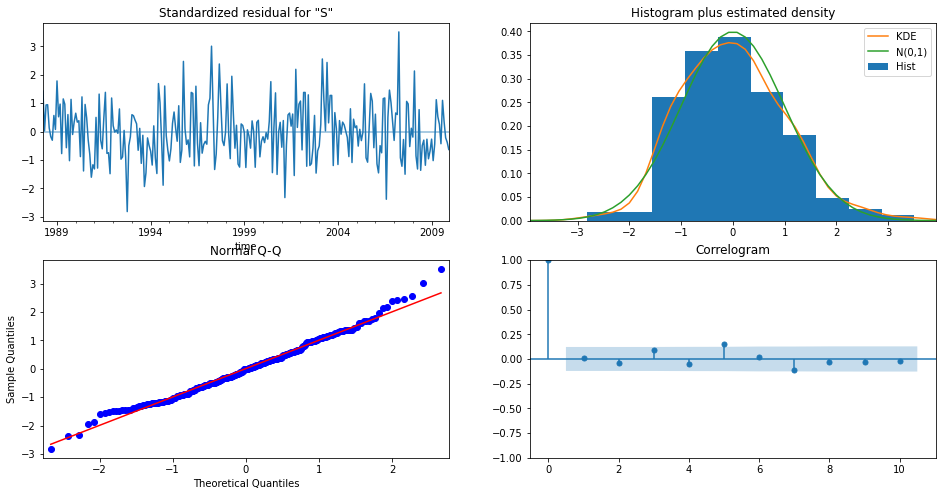

In [48]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [49]:
test.dropna(inplace=True)
test

,time,Switzerland
210374,2009-12-31 14:00:00,0.097840
210375,2009-12-31 15:00:00,0.068971
210376,2009-12-31 16:00:00,0.000000
210377,2009-12-31 17:00:00,0.000000
210378,2009-12-31 18:00:00,0.000000
...,...,...
262963,2015-12-31 19:00:00,0.000000
262964,2015-12-31 20:00:00,0.000000
262965,2015-12-31 21:00:00,0.000000
262966,2015-12-31 22:00:00,0.000000


In [50]:
pred = results.get_prediction(start=pd.to_datetime('2010'),end=pd.to_datetime('2016'), dynamic=False)
pred_ci = pred.conf_int()

In [51]:
test = test.set_index('time')
Y_test = test['Switzerland'].resample('M').mean()

In [52]:
#Model Performace 
y_forecasted = pred.predicted_mean
y_truth = Y_test['2010-01-31':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 5)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 5)))

The Mean Squared Error of our forecasts is 0.00032
The Root Mean Squared Error of our forecasts is 0.01794


In [53]:
df_time = df_time.set_index('time')
y_all = df_time['Switzerland'].resample('M').mean()
y_all

time
1986-01-31    0.061517
1986-02-28    0.109479
1986-03-31    0.122028
1986-04-30    0.112568
1986-05-31    0.162257
                ...   
2015-08-31    0.174613
2015-09-30    0.138278
2015-10-31    0.109944
2015-11-30    0.106227
2015-12-31    0.100758
Freq: M, Name: Switzerland, Length: 360, dtype: float64

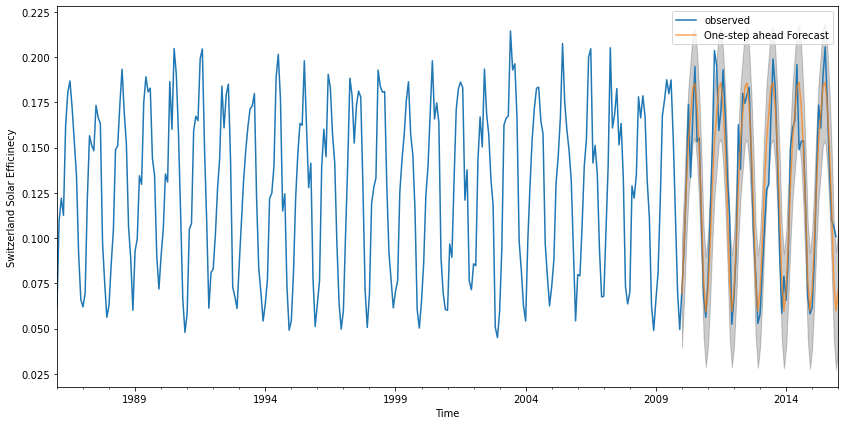

In [54]:
ax = y_all['1986-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Time')
ax.set_ylabel('Switzerland Solar Efficinecy')
plt.legend()

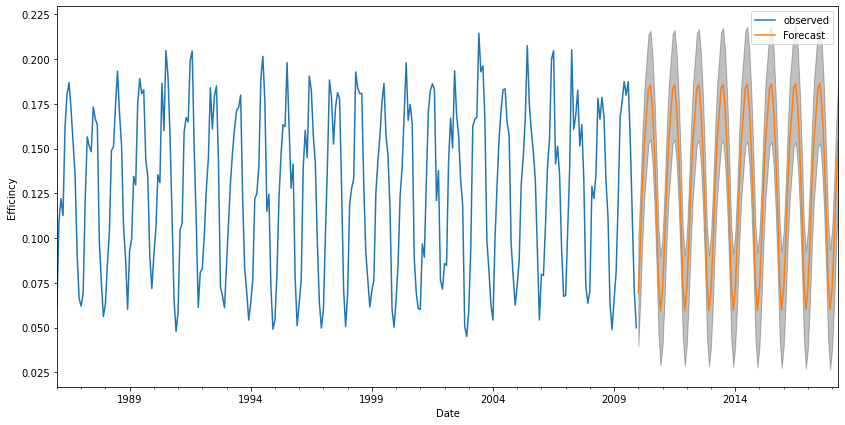

In [55]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Efficincy')
plt.legend()
plt.show()

In [56]:
model_loaded = ARIMAResults.load('TS_model_for_Efficency_Year_month.pkl')
print(model_loaded.params)

ar.L1       0.099865
ar.S.L12    1.001073
ma.S.L12   -1.048773
sigma2      0.000206
dtype: float64


In [57]:
model_loaded.predict('2022-01-02','2022-10-11')

2022-01-31    0.070885
2022-02-28    0.096538
2022-03-31    0.129463
2022-04-30    0.154169
2022-05-31    0.170348
2022-06-30    0.185044
2022-07-31    0.188928
2022-08-31    0.176367
2022-09-30    0.150454
2022-10-31    0.116710
Freq: M, Name: predicted_mean, dtype: float64